### Import your librares

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np

### Load your dataset

In [2]:
df = pd.read_csv('seattle_weather.csv')

In [3]:
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


### Handle missing data in PRCP and RAIN columns

In [4]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [5]:
df.dropna(inplace=True)

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


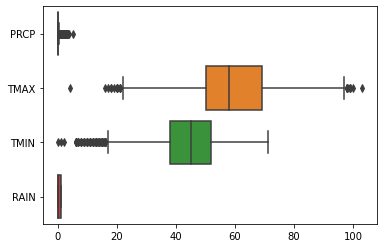

In [6]:
sns.boxplot(data=df, orient="h");

In [7]:
def outlier_clean(dataframe, column):
    Q1 = np.percentile(column, 25, interpolation = 'midpoint')
    Q3 = np.percentile(column, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    lower = Q1 - 1.5*(IQR)
    higher = Q3 + 1.5*(IQR)
    print('lower bound outliers ', lower)
    print('higher bound outliers', higher)
    dataframe = dataframe.drop(dataframe[(column > higher) | (column < lower)].index, inplace=True)


In [8]:
#PRCP Outlier 
outlier_clean(df, df['PRCP'])

lower bound outliers  -0.15000000000000002
higher bound outliers 0.25


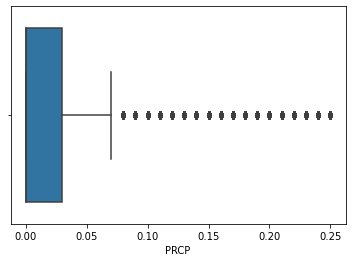

In [9]:
sns.boxplot(df['PRCP']);

In [10]:
#TMAX Outlier 
outlier_clean(df, df['TMAX'])

lower bound outliers  20.0
higher bound outliers 100.0


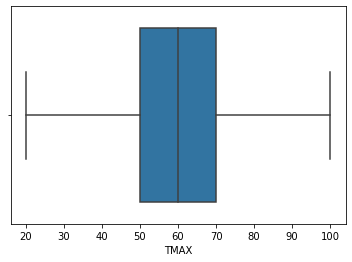

In [11]:
sns.boxplot(df['TMAX']);

In [12]:
#TMIN Outlier 
outlier_clean(df, df['TMIN'])

lower bound outliers  17.0
higher bound outliers 73.0


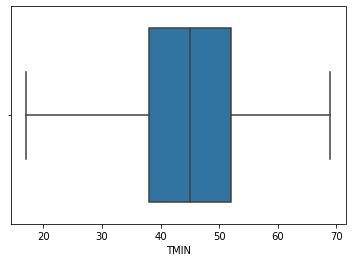

In [13]:
sns.boxplot(df['TMIN']);

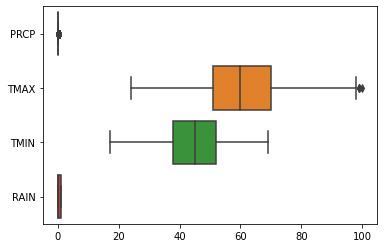

In [14]:
sns.boxplot(data=df, orient="h");